In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**1. Load the data into the pandas environment and identify some basic details of the
dataset.**

In [2]:
data=pd.read_csv('employee.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [33]:
data.shape

(9, 6)

In [34]:
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

**2. Reset the index as "name" as the index.**

In [4]:
data.set_index(['name'], inplace = True)

In [5]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


**3. Select rows for specific names Jack Morgan and Josh wills.**

In [35]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


**4. Select data for multiple values "Sales" and “Finance”.**

In [8]:
data[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


**5. Display employee who has more than 700 performance score.**

In [10]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


**6. Display employee who has more than 500 and less than 700 performance score**

In [11]:
data[(data['performance_score']<700) & (data['performance_score']>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


**7. Check and handle missing values in the dataset.**

In [12]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [13]:
data['age'] = data['age'].fillna(data['age'].mean())

In [14]:
data['income'] = data['income'].fillna(data['income'].median())

In [18]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [19]:
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

**8. Check the outliers and handle outliers in performance score using Percentiles.**

In [20]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

<AxesSubplot:xlabel='performance_score'>

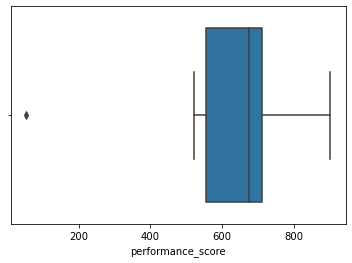

In [25]:
sns.boxplot(x=data['performance_score'])

In [26]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                     13.0
income               20000.0
performance_score      155.0
dtype: float64


In [30]:
data.shape

(9, 6)

In [28]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(7, 6)

**9. Check the gender column and do Dummy encoding.**

In [41]:
dummy_gender = pd.get_dummies(data['gender'])
print(dummy_gender)

               F  M
name               
Allen Smith    1  0
S Kumar        1  0
Jack Morgan    0  1
Ying Chin      1  0
Dheeraj Patel  1  0
Satyam Sharma  1  0
James Authur   1  0
Josh Wills     1  0
Leo Duck       0  1


In [44]:
data_gender= pd.merge(left=data, right=dummy_gender, left_index=True, right_index=True,)

In [43]:
data_gender

,age,income,gender,department,grade,performance_score,F,M
name,,,,,,,,
Allen Smith,45.000000,52000.0,F,Operations,G3,723,1,0
S Kumar,40.428571,16000.0,F,Finance,G0,520,1,0
Jack Morgan,32.000000,35000.0,M,Finance,G2,674,0,1
Ying Chin,45.000000,65000.0,F,Sales,G3,556,1,0
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711,1,0
Satyam Sharma,40.428571,62000.0,F,Sales,G3,649,1,0
James Authur,54.000000,52000.0,F,Operations,G3,53,1,0
Josh Wills,54.000000,52000.0,F,Finance,G3,901,1,0
Leo Duck,23.000000,98000.0,M,Sales,G4,709,0,1


**10.Do the standard scaling on the feature performance score.**

In [64]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x=data['performance_score'].values
print ('\nOriginal data values : \n', x)


Original data values : 
 [723 520 674 556 711 649  53 901 709]


In [65]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
print('Scaled data:',scaled)

ValueError: Expected 2D array, got 1D array instead:
array=[723. 520. 674. 556. 711. 649.  53. 901. 709.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.